In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [2]:
test1 = pd.read_csv('004690.KS.csv', encoding='cp949')
test1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,113000.0,116500.0,112500.0,115000.0,99230.085938,5988
1,2018-01-03,115000.0,115500.0,113500.0,113500.0,97935.781250,4183
2,2018-01-04,114500.0,114500.0,112000.0,112500.0,97072.906250,5738
3,2018-01-05,113000.0,114000.0,112000.0,114000.0,98367.203125,10500
4,2018-01-08,114500.0,119500.0,113500.0,119000.0,102681.562500,9805
...,...,...,...,...,...,...,...
1307,2023-04-24,493500.0,494000.0,348500.0,348500.0,348500.000000,36585
1308,2023-04-25,244000.0,244000.0,244000.0,244000.0,244000.000000,19600
1309,2023-04-26,171000.0,171000.0,171000.0,171000.0,171000.000000,46514
1310,2023-04-27,132000.0,142800.0,122200.0,124500.0,124500.000000,3085082


In [3]:
# date, close, volume만 남기기

test1 = test1[['Date', 'Close', 'Volume']]
test1

,Date,Close,Volume
0,2018-01-02,115000.0,5988
1,2018-01-03,113500.0,4183
2,2018-01-04,112500.0,5738
3,2018-01-05,114000.0,10500
4,2018-01-08,119000.0,9805
...,...,...,...
1307,2023-04-24,348500.0,36585
1308,2023-04-25,244000.0,19600
1309,2023-04-26,171000.0,46514
1310,2023-04-27,124500.0,3085082


In [4]:
test2 = pd.read_csv('게시글_004690.csv', encoding='cp949')
test2

,날짜,게시글
0,2017-07-25,1
1,2017-07-27,2
2,2017-08-04,2
3,2017-08-07,2
4,2017-08-08,1
...,...,...
1026,2023-04-27,4481
1027,2023-04-28,3090
1028,2023-04-29,306
1029,2023-04-30,298


In [5]:
test1.index = pd.DatetimeIndex(test1['Date'])
test1

,Date,Close,Volume
Date,,,
2018-01-02,2018-01-02,115000.0,5988
2018-01-03,2018-01-03,113500.0,4183
2018-01-04,2018-01-04,112500.0,5738
2018-01-05,2018-01-05,114000.0,10500
2018-01-08,2018-01-08,119000.0,9805
...,...,...,...
2023-04-24,2023-04-24,348500.0,36585
2023-04-25,2023-04-25,244000.0,19600
2023-04-26,2023-04-26,171000.0,46514


In [6]:
test2.index = pd.DatetimeIndex(test2['날짜'])
test2

,날짜,게시글
날짜,,
2017-07-25,2017-07-25,1
2017-07-27,2017-07-27,2
2017-08-04,2017-08-04,2
2017-08-07,2017-08-07,2
2017-08-08,2017-08-08,1
...,...,...
2023-04-27,2023-04-27,4481
2023-04-28,2023-04-28,3090
2023-04-29,2023-04-29,306


In [7]:
# https://ddaaadd.tistory.com/154

m = test1.join(test2)

m

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,115000.0,5988,2018-01-02,1.0
2018-01-03,2018-01-03,113500.0,4183,2018-01-03,1.0
2018-01-04,2018-01-04,112500.0,5738,NaN,NaN
2018-01-05,2018-01-05,114000.0,10500,NaN,NaN
2018-01-08,2018-01-08,119000.0,9805,NaN,NaN
...,...,...,...,...,...
2023-04-24,2023-04-24,348500.0,36585,2023-04-24,516.0
2023-04-25,2023-04-25,244000.0,19600,2023-04-25,2036.0
2023-04-26,2023-04-26,171000.0,46514,2023-04-26,4162.0


In [8]:
m.head(20)

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,115000.0,5988,2018-01-02,1.0
2018-01-03,2018-01-03,113500.0,4183,2018-01-03,1.0
2018-01-04,2018-01-04,112500.0,5738,NaN,NaN
2018-01-05,2018-01-05,114000.0,10500,NaN,NaN
2018-01-08,2018-01-08,119000.0,9805,NaN,NaN
2018-01-09,2018-01-09,121000.0,7962,NaN,NaN
2018-01-10,2018-01-10,120000.0,5820,NaN,NaN
2018-01-11,2018-01-11,119500.0,4642,NaN,NaN
2018-01-12,2018-01-12,118500.0,5412,NaN,NaN


In [9]:
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})

In [10]:
heatmap_data = m[["Close", "Volume", "Post"]]

<Axes: title={'center': '004690.KS'}>

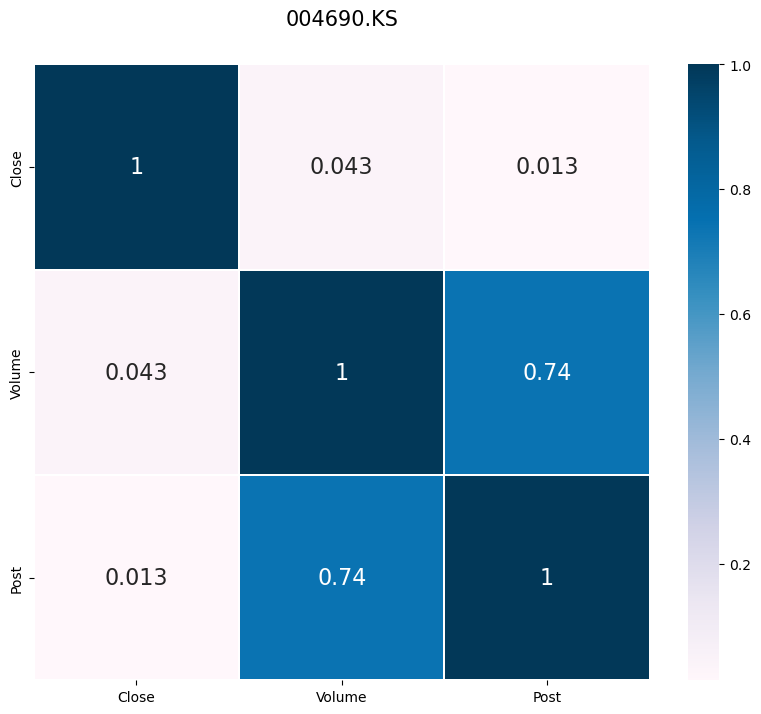

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("004690.KS", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})